In [3]:
#import os
#import torch
# 打印当前工作目录
#print("当前工作目录:", os.getcwd())
# 更改工作目录到指定路径
#os.chdir('/root/autodl-tmp/RPG-DiffusionMaster-main')
# 再次打印当前工作目录以确认更改
#print("更改后的工作目录:", os.getcwd())

当前工作目录: /root/autodl-tmp/RPG-DiffusionMaster-main
更改后的工作目录: /root/autodl-tmp/RPG-DiffusionMaster-main


In [4]:
#import requests
#import torch
#from PIL import Image
#from transformers import MllamaForConditionalGeneration, AutoProcessor

In [5]:
#model_id = "/root/autodl-tmp/llama3"

In [6]:
#model = MllamaForConditionalGeneration.from_pretrained(
#    model_id,
#    torch_dtype=torch.bfloat16,
#    device_map="auto",
#)

The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
processor = AutoProcessor.from_pretrained(model_id)

In [8]:
image = Image.open("/root/autodl-tmp/RPG-yuanming/examples/score-image/a airplane on the right of a person_003757.png")

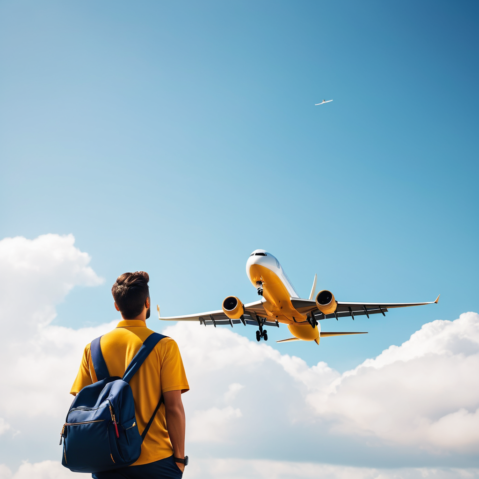

In [9]:
image

In [8]:
#text0109 = '/root/autodl-tmp/RPG-DiffusionMaster-main/cotprompt.txt'

In [98]:
#prompt="a airplane on the right of a person"

In [99]:
#prompt

'a airplane on the right of a person'

In [100]:
#with open('/root/autodl-tmp/RPG-DiffusionMaster-main/cotprompt.txt', 'r') as file:
#    text0109 = file.read()
#with open('/root/autodl-tmp/RPG-DiffusionMaster-main/1220.txt', 'r') as file:
#    template = file.readlines()

In [101]:
print(template)

['You are a master of image content recognition. You need to extract the key objects in the caption, look for those key objects in the picture, and then tell me if those key objects are included in the picture.Your task is described as follows:\n', 'Extract the key entities from the title and locate those key entities in the picture.\n', 'For each key object identified in the previous step, use precise spatial imagination to determine the specific area in the image where each object is allocated, segment the image into several areas, and number them starting from 0.The area refers to dividing the entire image into different regions for a general layout.Each key entities is assigned to a area.This layout should segment the image and strictly follow the method below:\n', 'a. Determine whether the image is divided into multiple rows by key objects (It should be noted that a single entity should not be split into different rows, except when describing different parts of a person like the h

In [102]:
#user_textprompt=f"Caption: {prompt}\nLet's think step by step:"

In [103]:
#print(user_textprompt)

Caption: a airplane on the right of a person
Let's think step by step:


In [104]:
#textprompt= f"{' '.join(template)} \n{user_textprompt}"

In [105]:
#print(textprompt)

You are a master of image content recognition. You need to extract the key objects in the caption, look for those key objects in the picture, and then tell me if those key objects are included in the picture.Your task is described as follows:
 Extract the key entities from the title and locate those key entities in the picture.
 For each key object identified in the previous step, use precise spatial imagination to determine the specific area in the image where each object is allocated, segment the image into several areas, and number them starting from 0.The area refers to dividing the entire image into different regions for a general layout.Each key entities is assigned to a area.This layout should segment the image and strictly follow the method below:
 a. Determine whether the image is divided into multiple rows by key objects (It should be noted that a single entity should not be split into different rows, except when describing different parts of a person like the head, clothes/b

In [106]:
messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": textprompt}
    ]}
]

In [107]:
input_text = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt"
).to(model.device)

In [108]:
output = model.generate(**inputs, max_new_tokens=1024)
print(processor.decode(output[0]))

<|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>You are a master of image content recognition. You need to extract the key objects in the caption, look for those key objects in the picture, and then tell me if those key objects are included in the picture.Your task is described as follows:
 Extract the key entities from the title and locate those key entities in the picture.
 For each key object identified in the previous step, use precise spatial imagination to determine the specific area in the image where each object is allocated, segment the image into several areas, and number them starting from 0.The area refers to dividing the entire image into different regions for a general layout.Each key entities is assigned to a area.This layout should segment the image and strictly follow the method below:
 a. Determine whether the image is divided into multiple rows by key objects (It should be noted that a single entity should not be split into different rows, except 